# Projeto de Analise de Gastos da Câmara de Deputados em 2020

### Gastos dos Deputados Federais em 2020

Neste notebook tentarei, usando conhecimentos básicos de Python para DataScience para demonstrar os gastos dos Deputados Federais no ano de 2020:

    * Quem foram os 10 Deputados que mais gastaram em 2020
    * Quem foram os 10 Deputados que menos gastaram em 2020
    * Gastos de Deputados por Partidos
    
Todos esses dados podem ser encontrados em uma API Pública dos Dados Abertos da Câmara
https://dadosabertos.camara.leg.br/api/

O acesso aos dados são públicos, e a responsabilidade pela veracidade das informações são totalmente da Câmara dos Deputados.

In [77]:
# Usei a biblioteca pandas que será fundamental para a construção de nossos DataFrames e leitura dos dados
# Usei a biblioteca Requests para requisição na API da Camara dos Deputados
# Usei a biblioteca Seaborn para a construção da visualização dos dados

import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Primeiro farei a requisição do nome dos Deputados e guardarei na URL abaixo

url = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
resultado = requests.get(url)

In [3]:
#Nessa etapa irei estruturar o dataframe a partir do json requisitado na url

deputados = pd.DataFrame(resultado.json()["dados"])

In [4]:
#Esse será o resultado

deputados.head()

,email,id,idLegislatura,nome,siglaPartido,siglaUf,uri,uriPartido,urlFoto
0,dep.abiliosantana@camara.leg.br,204554,56,Abílio Santana,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
1,dep.abouanni@camara.leg.br,204521,56,Abou Anni,PSL,SP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
2,dep.acaciofavacho@camara.leg.br,204379,56,Acácio Favacho,PROS,AP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
3,dep.adolfoviana@camara.leg.br,204560,56,Adolfo Viana,PSDB,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
4,dep.adrianaventura@camara.leg.br,204528,56,Adriana Ventura,NOVO,SP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...


In [5]:
# A variável gastos irá guardar uma lista com todas as informações de gastos de cada deputado

gastos = []

for id in deputados.id:
    url_despesa = f"https://dadosabertos.camara.leg.br/api/v2/deputados/{id}/despesas?ano=2020&ordem=ASC"
    resposta = requests.get(url_despesa)
    gasto = pd.DataFrame(resposta.json()["dados"])
    gasto['id'] = id
    gastos.append(gasto)

In [6]:
total = pd.concat(gastos, sort=True)

In [7]:
total

,ano,cnpjCpfFornecedor,codDocumento,codLote,codTipoDocumento,dataDocumento,id,mes,nomeFornecedor,numDocumento,numRessarcimento,parcela,tipoDespesa,tipoDocumento,urlDocumento,valorDocumento,valorGlosa,valorLiquido
0,2020.0,15139629000194,7004672.0,1671810.0,0.0,2020-01-15,204554,1.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,417815556,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,https://www.camara.leg.br/cota-parlamentar/doc...,132.76,14.41,118.35
1,2020.0,15139629000194,7023227.0,1680936.0,0.0,2020-02-12,204554,2.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,423977595,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,https://www.camara.leg.br/cota-parlamentar/doc...,162.27,2.30,159.97
2,2020.0,15139629000194,7049816.0,1693675.0,0.0,2020-03-13,204554,3.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,430442113,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,https://www.camara.leg.br/cota-parlamentar/doc...,284.36,3.33,281.03
3,2020.0,15139629000194,7049817.0,1693676.0,0.0,2020-04-13,204554,4.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,437017526,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,https://www.camara.leg.br/cota-parlamentar/doc...,80.96,0.00,80.96
4,2020.0,15139629000194,7060152.0,1699542.0,0.0,2020-05-13,204554,5.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,443686627,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,https://www.camara.leg.br/cota-parlamentar/doc...,65.32,19.46,45.86
5,2020.0,15139629000194,7071762.0,1705745.0,0.0,2020-06-10,204554,6.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,4500093911,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,https://www.camara.leg.br/cota-parlamentar/doc...,47.13,1.98,45.15
6,2020.0,15139629000194,7076692.0,1708198.0,0.0,2020-07-13,204554,7.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,456606790,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,https://www.camara.leg.br/cota-parlamentar/doc...,55.06,0.98,54.08
7,2020.0,15139629000194,7086351.0,1713101.0,0.0,2020-08-12,204554,8.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,463058968,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,https://www.camara.leg.br/cota-parlamentar/doc...,59.24,1.35,57.89
8,2020.0,15139629000194,7101142.0,1720324.0,0.0,2020-09-11,204554,9.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,469705596,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,https://www.camara.leg.br/cota-parlamentar/doc...,75.90,1.32,74.58
9,2020.0,15139629000194,7118482.0,1728100.0,0.0,2020-10-13,204554,10.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,476186306,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,https://www.camara.leg.br/cota-parlamentar/doc...,61.38,7.38,54.00


In [8]:
# Agora para verificar se a base possui valores ausentes

total.isnull().sum()

ano                    0
cnpjCpfFornecedor      0
codDocumento           0
codLote                0
codTipoDocumento       0
dataDocumento         53
id                     0
mes                    0
nomeFornecedor         0
numDocumento           0
numRessarcimento       0
parcela                0
tipoDespesa            0
tipoDocumento          0
urlDocumento         171
valorDocumento         0
valorGlosa             0
valorLiquido           0
dtype: int64

In [11]:
#Encontramos duas colunas com dados ausentes das quais não iremos usar para o projeto
# Deletaremos então...
del total["dataDocumento"]
del total["urlDocumento"]

In [12]:
# Agora para verificar se a base possui valores ausentes

total.isnull().sum()

ano                  0
cnpjCpfFornecedor    0
codDocumento         0
codLote              0
codTipoDocumento     0
id                   0
mes                  0
nomeFornecedor       0
numDocumento         0
numRessarcimento     0
parcela              0
tipoDespesa          0
tipoDocumento        0
valorDocumento       0
valorGlosa           0
valorLiquido         0
dtype: int64

In [13]:
print(total.shape)
total.drop_duplicates()
print(total.shape)

(7466, 16)
(7466, 16)


In [14]:
total.head()

,ano,cnpjCpfFornecedor,codDocumento,codLote,codTipoDocumento,id,mes,nomeFornecedor,numDocumento,numRessarcimento,parcela,tipoDespesa,tipoDocumento,valorDocumento,valorGlosa,valorLiquido
0,2020.0,15139629000194,7004672.0,1671810.0,0.0,204554,1.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,417815556,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,132.76,14.41,118.35
1,2020.0,15139629000194,7023227.0,1680936.0,0.0,204554,2.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,423977595,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,162.27,2.30,159.97
2,2020.0,15139629000194,7049816.0,1693675.0,0.0,204554,3.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,430442113,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,284.36,3.33,281.03
3,2020.0,15139629000194,7049817.0,1693676.0,0.0,204554,4.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,437017526,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,80.96,0.00,80.96
4,2020.0,15139629000194,7060152.0,1699542.0,0.0,204554,5.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,443686627,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,65.32,19.46,45.86


### Carregando para BD sql_lite

In [17]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///dados_abertos.db")

In [18]:
deputados.to_sql("deputados", engine)
total.to_sql("despesas_totais", engine)

### Por fim a analise

In [21]:
total = pd.read_sql("SELECT * FROM despesas_totais;", engine)

In [22]:
total.head(5)

,index,ano,cnpjCpfFornecedor,codDocumento,codLote,codTipoDocumento,id,mes,nomeFornecedor,numDocumento,numRessarcimento,parcela,tipoDespesa,tipoDocumento,valorDocumento,valorGlosa,valorLiquido
0,0,2020.0,15139629000194,7004672.0,1671810.0,0.0,204554,1.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,417815556,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,132.76,14.41,118.35
1,1,2020.0,15139629000194,7023227.0,1680936.0,0.0,204554,2.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,423977595,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,162.27,2.30,159.97
2,2,2020.0,15139629000194,7049816.0,1693675.0,0.0,204554,3.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,430442113,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,284.36,3.33,281.03
3,3,2020.0,15139629000194,7049817.0,1693676.0,0.0,204554,4.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,437017526,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,80.96,0.00,80.96
4,4,2020.0,15139629000194,7060152.0,1699542.0,0.0,204554,5.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,443686627,,0.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,65.32,19.46,45.86


In [23]:
deputados = pd.read_sql("SELECT * FROM deputados;", engine)
deputados.head()

,index,email,id,idLegislatura,nome,siglaPartido,siglaUf,uri,uriPartido,urlFoto
0,0,dep.abiliosantana@camara.leg.br,204554,56,Abílio Santana,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
1,1,dep.abouanni@camara.leg.br,204521,56,Abou Anni,PSL,SP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
2,2,dep.acaciofavacho@camara.leg.br,204379,56,Acácio Favacho,PROS,AP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
3,3,dep.adolfoviana@camara.leg.br,204560,56,Adolfo Viana,PSDB,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
4,4,dep.adrianaventura@camara.leg.br,204528,56,Adriana Ventura,NOVO,SP,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...


In [24]:
total = total.merge(deputados, on=['id'])

In [25]:
total.head()

,index_x,ano,cnpjCpfFornecedor,codDocumento,codLote,codTipoDocumento,id,mes,nomeFornecedor,numDocumento,...,valorLiquido,index_y,email,idLegislatura,nome,siglaPartido,siglaUf,uri,uriPartido,urlFoto
0,0,2020.0,15139629000194,7004672.0,1671810.0,0.0,204554,1.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,417815556,...,118.35,0,dep.abiliosantana@camara.leg.br,56,Abílio Santana,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
1,1,2020.0,15139629000194,7023227.0,1680936.0,0.0,204554,2.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,423977595,...,159.97,0,dep.abiliosantana@camara.leg.br,56,Abílio Santana,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
2,2,2020.0,15139629000194,7049816.0,1693675.0,0.0,204554,3.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,430442113,...,281.03,0,dep.abiliosantana@camara.leg.br,56,Abílio Santana,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
3,3,2020.0,15139629000194,7049817.0,1693676.0,0.0,204554,4.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,437017526,...,80.96,0,dep.abiliosantana@camara.leg.br,56,Abílio Santana,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...
4,4,2020.0,15139629000194,7060152.0,1699542.0,0.0,204554,5.0,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,443686627,...,45.86,0,dep.abiliosantana@camara.leg.br,56,Abílio Santana,PL,BA,https://dadosabertos.camara.leg.br/api/v2/depu...,https://dadosabertos.camara.leg.br/api/v2/part...,https://www.camara.leg.br/internet/deputado/ba...


In [59]:
gastos_por_deputados = total.groupby(['nome']).sum()[['valorLiquido']]

In [60]:
gastos_por_deputados = gastos_por_deputados.sort_values('valorLiquido', ascending=False)

In [61]:
gastos_por_deputados.head(10)

,valorLiquido
nome,
Vicentinho Júnior,365000.00
Gustinho Ribeiro,337200.00
Aline Gurgel,327932.64
Carlos Bezerra,278000.00
Jhonatan de Jesus,233102.90
Nivaldo Albuquerque,199251.75
Silas Câmara,185006.39
Domingos Neto,173870.99
Vinicius Gurgel,165337.57


In [67]:
grafico = pd.DataFrame({"Nome": gastos_por_deputados.index, "Valor Gasto": gastos_por_deputados.valorLiquido})

In [70]:
grafico.reset_index(drop=True, inplace=True)
grafico.head(10)

,Nome,Valor Gasto
0,Vicentinho Júnior,365000.00
1,Gustinho Ribeiro,337200.00
2,Aline Gurgel,327932.64
3,Carlos Bezerra,278000.00
4,Jhonatan de Jesus,233102.90
5,Nivaldo Albuquerque,199251.75
6,Silas Câmara,185006.39
7,Domingos Neto,173870.99
8,Vinicius Gurgel,165337.57
9,Ottaci Nascimento,152877.11


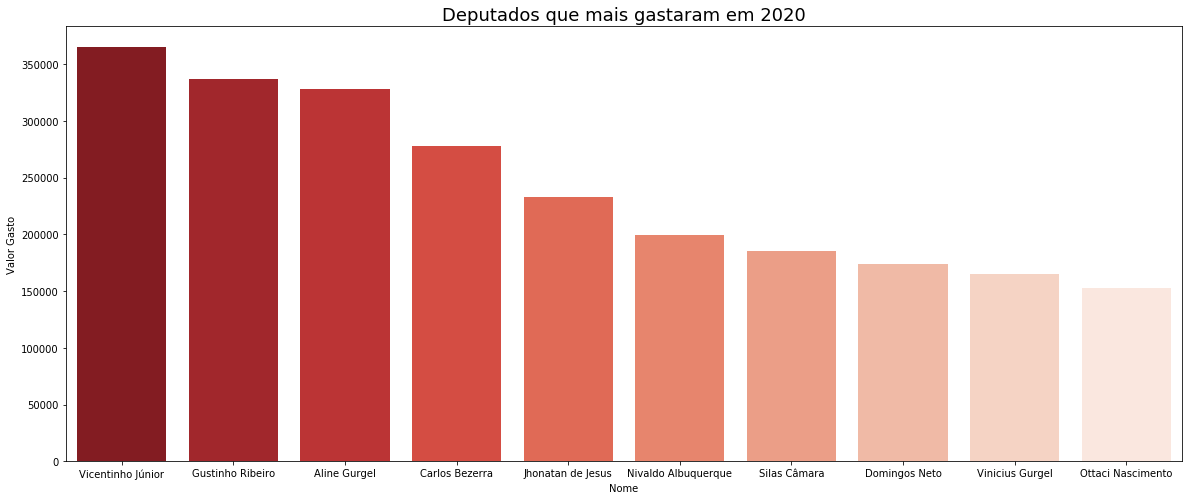

In [113]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x="Nome", y="Valor Gasto", data=grafico.query('index <= 9'), palette="Reds_r").set_title("Deputados que mais gastaram em 2020", fontsize=18)

In [84]:
grafico.shape

(499, 2)

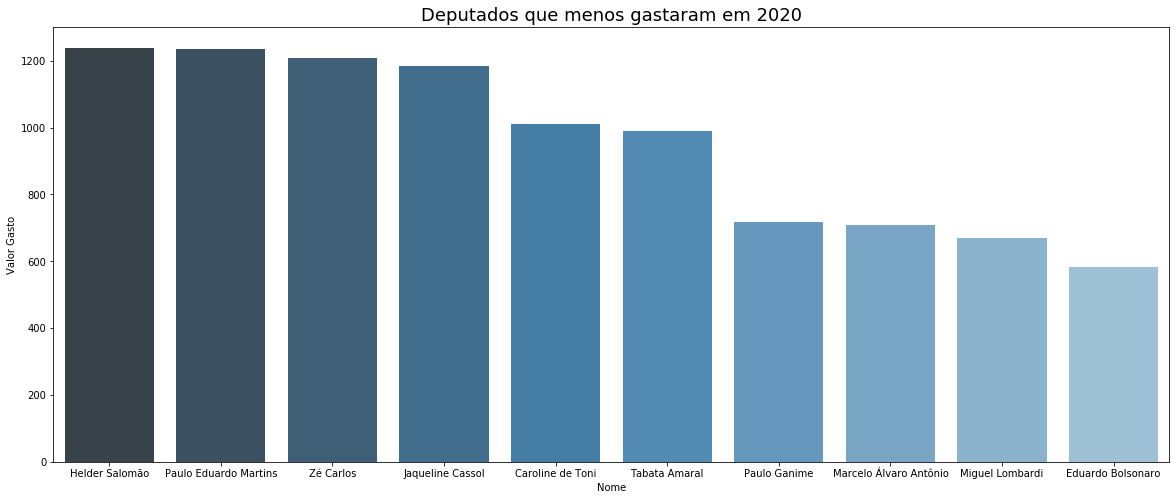

In [115]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x="Nome", y="Valor Gasto", data=grafico.query('index >= 489'), palette="Blues_d").set_title("Deputados que menos gastaram em 2020", fontsize=18)

In [122]:
gastos_por_partidos = total.groupby(['siglaPartido']).sum()[['valorLiquido']]

In [124]:
gastos_por_partidos = gastos_por_partidos.sort_values('valorLiquido', ascending=False)
gastos_por_partidos.head(3)

,valorLiquido
siglaPartido,
REPUBLICANOS,1605308.85
PL,1534825.62
PT,971763.03


In [127]:
grafico_partidos = pd.DataFrame({"Partido": gastos_por_partidos.index, "Valor": gastos_por_partidos.valorLiquido})
grafico_partidos.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Os 10 partidos que mais gastaram por deputado em 2020')

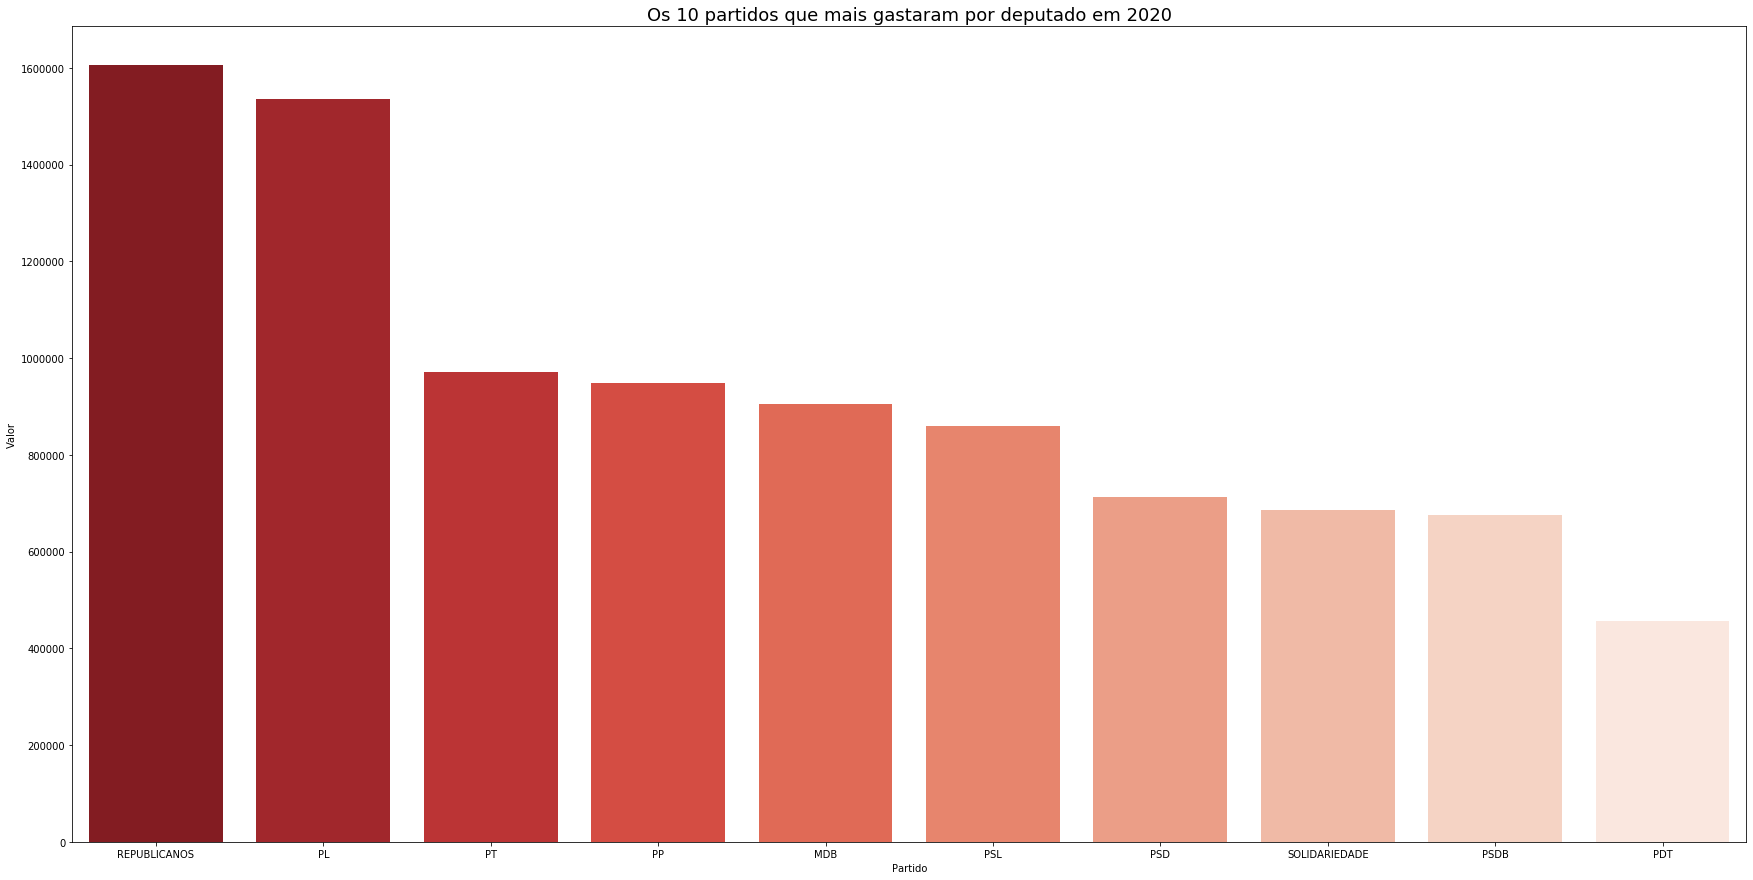

In [138]:
plt.figure(figsize = (30,15))
ax = sns.barplot(x="Partido", y="Valor", data=grafico_partidos.query('index <= 9'), palette="Reds_r")
ax.set_title("Os 10 partidos que mais gastaram por deputado em 2020", fontsize=18)


Text(0.5, 1.0, 'Os 10 partidos que menos gastaram por deputado em 2020')

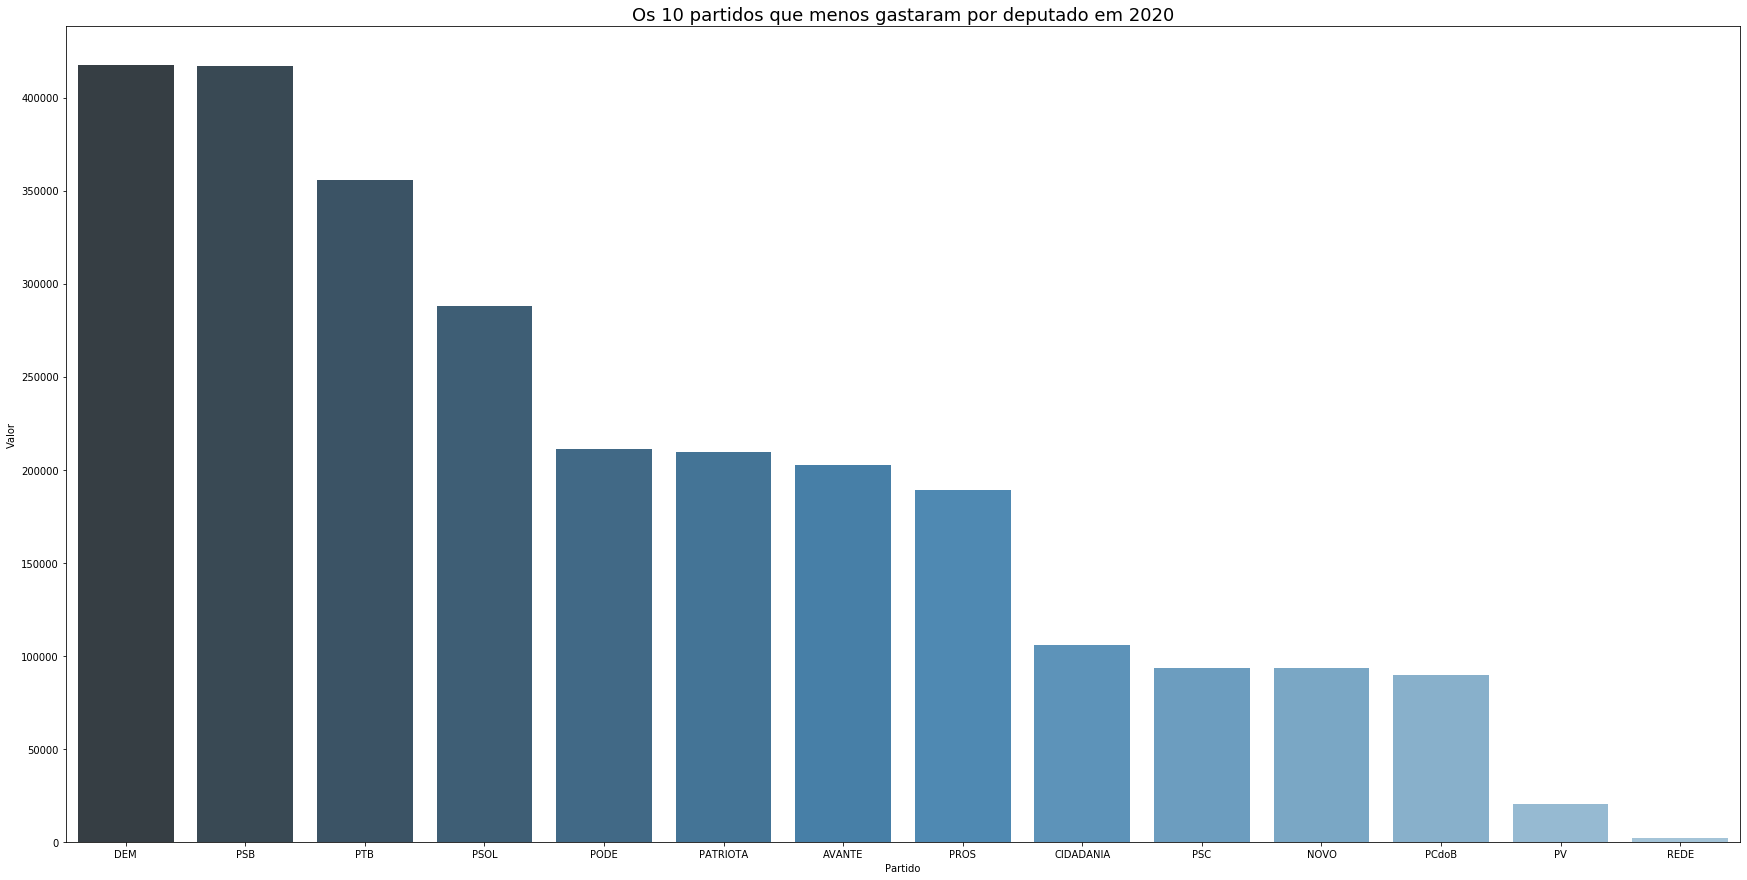

In [140]:
plt.figure(figsize = (30,15))
ax = sns.barplot(x="Partido", y="Valor", data=grafico_partidos.query('index > 9'), palette="Blues_d")
ax.set_title("Os 10 partidos que menos gastaram por deputado em 2020", fontsize=18)


In [144]:
gastos_por_deputados = total.groupby(['nome', 'siglaPartido']).sum()[['valorLiquido']]
gastos_por_deputados = gastos_por_deputados.sort_values('valorLiquido', ascending=False)
gastos_por_deputados.head(10)

,,valorLiquido
nome,siglaPartido,
Vicentinho Júnior,PL,365000.00
Gustinho Ribeiro,SOLIDARIEDADE,337200.00
Aline Gurgel,REPUBLICANOS,327932.64
Carlos Bezerra,MDB,278000.00
Jhonatan de Jesus,REPUBLICANOS,233102.90
Nivaldo Albuquerque,PTB,199251.75
Silas Câmara,REPUBLICANOS,185006.39
Domingos Neto,PSD,173870.99
Vinicius Gurgel,PL,165337.57


In [145]:
gastos_por_deputados = total.groupby(['nome', 'siglaPartido']).sum()[['valorLiquido']]
gastos_por_deputados = gastos_por_deputados.sort_values('valorLiquido', ascending=False)
gastos_por_deputados.tail(10)

,,valorLiquido
nome,siglaPartido,
Helder Salomão,PT,1239.28
Paulo Eduardo Martins,PSC,1235.15
Zé Carlos,PT,1208.98
Jaqueline Cassol,PP,1184.72
Caroline de Toni,PSL,1011.54
Tabata Amaral,PDT,991.28
Paulo Ganime,NOVO,717.14
Marcelo Álvaro Antônio,PSL,709.97
Miguel Lombardi,PL,670.38


## Conclusão

* Entre os partidos que mais gastaram temos: Republicanos, PL, PT, PP e MDB
* Entre os dez deputados que mais gastaram 3 são do republicanos, partido que ocupa o 1º lugar em gastos por deputado
* O PL possui 2 deputados entre os que mais gastaram e se encontre entre o 2º partido que mais obteve gastos em 2020
* Os que menos gastaram foram: PSC, NOVO, PCdoB, PV e REDE
* Dentre os 10 que menos gastaram em 2020 somente Paulo martins figura juntamente com os partidos que menos gastaram
* Apesar de 3 deputados do PSL estarem entre os últimos no raking de gastos, o partido figura a sexta colocação em gastos da câmara em 2020